<a href="https://colab.research.google.com/github/marcmarzo/GIS-Marc/blob/master/4_spatial_patterns_in_excavation_data_Marc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **More about spatial patterns**



Understanding the meanings behind patterns of finds recovered through excavation is a tricky problem. We hope to distinguish activity areas, places devoted to domestic and industrial use, or inhabited places that are distinct from liminal ones. We often want to discern change over time, identifying areas with finds associated with different temporal periods. 

To successfully unravel these patterns, we must look not only at the **distributions** of different types of finds, but how they **correlate** with one another, the character of the contexts in which they were recovered, and their own physical and social characteristics. Are they likely to be curated? Are they light and likely to be moved from one area to another by post-depositional processes? It's all a bit of a mess. 

Importantly, all these processes are spatial. Alignments or proximity between areas with similar (or quite different) finds is potentially meaningful. 

The aims of this exercise is for you to:
* learn to work real special finds data from an excavation, in all its messiness, to look for spatial patterns and relationships. **-> this is all about better identifying spatial patterns**
* start thinking about quantitative and spatial approaches to finds data from excavations and how they can help us better understand the patterns we see. **-> this is all about  better quantifying spatial patterns**

You'll do this using data collected by the Gabii Project, a 10+ year excavation in central Italy. 

 




### Let's get started...####  
<font color='orangered'> ~ déjà vu ~</font> 
* Make your own copy of this notebook;
* Get your tools... it is like for writing on paper, you need a pen, here you have to import your libraries...
* Remember to hit play or type 'Ctrl'+'Enter' to run the code in any cell (grey shaded cells in the page) to make things happen!


In [16]:
##codecell_SpatialPatterns_ImportUrLibraries

# as usual, start by getting your tools: your prerequisites.


%matplotlib inline
# Matplotlib is your tool for drawing graphs and basic maps. You need this!
!pip install fiona
!pip install geopandas
import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets



 **Learning a new language – decomposing the code** 
  <br>
  in #codecell_SpatialPatterns_ImportUrLibraries. These are what we call **prerequisites**. You know by now that they are basic tools so you can get started.
* *Pandas* manipulate data. 
* *Geo-pandas* manipulate geographic data. They're also black and white and like to eat bamboo...  You need these to manipulate your data!
* *Fiona* helps with geographic data (find more about [fiona](https://pypi.org/project/Fiona/)).
* *Requests* are for asking for things. It's good to be able to ask for things.
* *ipywidgets* supports interactivity.

### **Getting to know your Data...**####  

In [17]:
##codecell_SpatialPatterns_ImportUrData

# then get your data
# This is where I put the data. It's in a format called geojson, used to represent spatial geometry (shapes) and attributes (text).
url = 'http://ropitz.github.io/digitalantiquity/data/gabii_SU.geojson'

# Please get me the data at that web address (url):
# use requests.get to retrieve data from any destination
request = requests.get(url)

# I will use the letter 'b' to refer to the data, like a nickname
#we can use requests to read the response content in bytes
b = bytes(request.content)

#So we will use fiona.BytesCollection referred by the letter 'f':
# to read the raw data (as single-file formats or zipped shapefiles)
# to wrap up all the data from 'b'
# check the coordinate refereence system (crs) listed in the features
with fiona.BytesCollection(b) as f:
    crs = f.crs
    #by using also GeoDataFrame.from_features you can read geospatial data that's in the url without saving that data to disk (your PC) first
    gabii_su_poly = gpd.GeoDataFrame.from_features(f, crs=crs)
    # and print out the first few lines of the file, so I can check everything looks ok: you know this by now...we will call .head()
    print(gabii_su_poly.head())



                                            geometry  ...  Shape_Area
0  POLYGON Z ((1415906.023 5144201.194 64.774, 14...  ...    0.030028
1  POLYGON Z ((1415940.483 5144159.515 62.910, 14...  ...    0.567181
2  POLYGON Z ((1415956.547 5144171.764 62.566, 14...  ...    0.030045
3  POLYGON Z ((1415955.891 5144171.889 62.624, 14...  ...    0.030902
4  POLYGON Z ((1415956.267 5144171.289 62.618, 14...  ...    0.170833

[5 rows x 6 columns]


**Learning a new language – decomposing the code** 
  <br>
  in #codecell_SpatialPatterns_ImportUrData:<br>
 
 <font color='magenta'>  *GeoJSON*  </font>  is used to store the excavation data. GeoJSON format allows to encode a variety of geographic data structures which contains features with spatial attributes (e.g. points, line strings, polygons, multiparts geometries) and non-spatial attributes (text). This is a really useful format to use when creating a GIS. <br>
  <font color='magenta'>  *bytes()*  </font>  method returns bytes object which is an immmutable (cannot be modified) sequence of integers. We tend to use this to compress data, save or send it. <br>
  <font color='magenta'>  *requests.get*  </font> is used to retrieve data from any destination & <font color='magenta'>  *requests.content*  </font>  to read all content which is in bytes (for non-text requests using the .content property).<br>
<font color='magenta'>  *BytesCollection()*  </font>  takes a buffer of bytes and maps to a virtual file that can then be opened by fiona. By using  both fiona.BytesCollection and GeoDataFrame.from_features you can:
* to read the raw data (as single-file formats or zipped shapefiles)
* to wrap up all the data from 'b'
* check the coordinate refereence system (crs) listed in the features


 **Open source**

For the past month, we have abundantly benefitted from open-source software, data, tools, code, design documents, or content. It is only natural to open, share and use the results of 10 years excavation...

### **Assessing your data visually...**####  
   So you know what's in this dataset... Maybe you want to see it before you start querying or analysing it? ... Start by visualising the spatial data for all the contexts (stratigraphic units) from the excavation we'll be exploring.

So far you have dealt with survey data where all data has been logged with coordinates (x, y and sometimes z for the elevation height). However, it is not always possible, or even meaningful, to record the coordinates of all artefacts retrieved during an excavation, especially if it lasts over several years. It is then more appropriate to use stratigraphical units (SU). The spatial analysis of these finds is more challenging as they don't have a spatial location per se. We need to think carefully about organising and presenting them. Colour can be a great help for this!

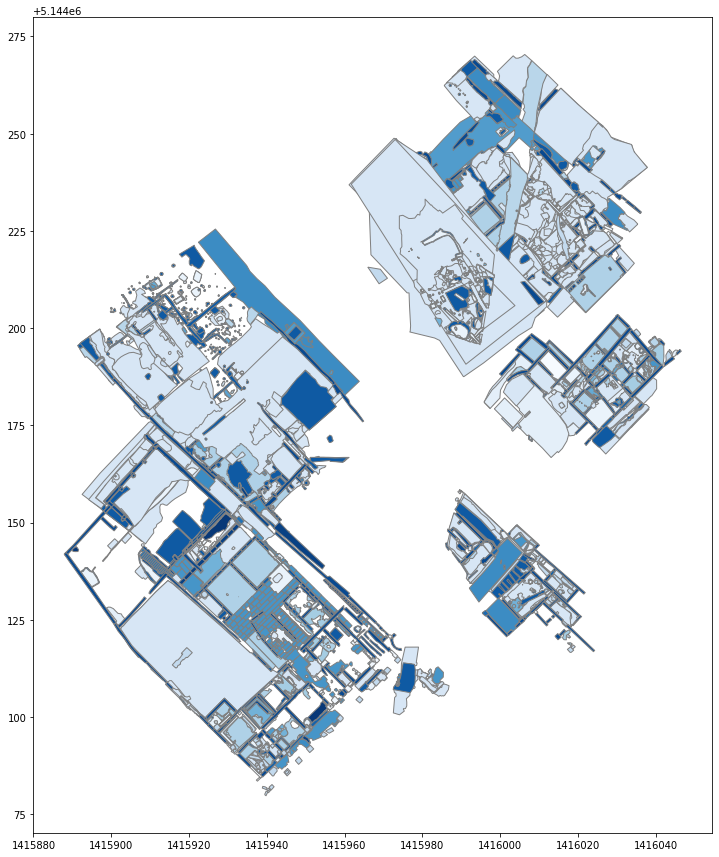

In [18]:
##codecell_SpatialPatterns_PlottingUrData


# Now we have polygons, the shapes of our contexts. Let's visualise the data to double check that all is well
# We'll use again the function .plot (see lab_Webmaps&Distributions)
# 'plot' means draw me an image showing the geometry of each feature in my data. 
# We want to control things like the color of different types of features on our map. 
# I used the 'Blues' colorscale command (cmap stands for 'colour map') 
# and asked it to draw the polygons differently based on the type of feature.

gabii_map1 = gabii_su_poly.plot(column='DESCRIPTIO', cmap='Blues', edgecolor='grey', figsize=(15, 15));


####**Learning a new language – decomposing the code** ####

In #codecell_SpatialPatterns_PlottingUrData, when using <font color='magenta'>  .plot()</font>, when <font color='magenta'>  column=' '  </font>  is specifed,  the plot colouring is based on its values. The colour scale is defined by using <font color='magenta'>  cmap=''   </font> , the edge of the features (our polygons) are defined by <font color='magenta'>  edgecolor=''   </font>  and the size of the plot by <font color='magenta'>  figsize=(width, height))   </font> .

you can of course add parameters/symbologies to your plots. The choice of parameters is largely dictated by your data analysis. [Here](http://geopandas.org/mapping.html) is some documentation on plot generation.

The colorscale options are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

Swap out 'Blues' in the cell above for any of these options...

<img src="https://matplotlib.org/3.1.1/_images/sphx_glr_colormaps_002.png" width="400"/> </div>



###**Loading the special finds**### 

Like many excavations, not every special find in this datset has spatial coordinates associated with it (because in real archaeology life things are found in the sieve, the wheelbarrow, and during washing). 





In [19]:
###codecell_SpatialPatterns_WhichTypeOfSpecialFinds&fromWhere?

# Now I'm going to bring in all the basic Gabii special finds data - descriptions, object types, IDs and the contexts from which they come.
# We've had a few special finds over the years.
sf_su = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/spf_SU.csv")
sf_su

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
3,0,80,ceramic fragment,Ceramic Fragment
4,0,82,fish hook,NaN
...,...,...,...,...
2639,8365,2749,Bronze hair pin,Pin
2640,8365,2751,Lead Weight,Metal Object
2641,8365,2758,african red slip fragment with a moulded face.,Ceramic Fragment
2642,8375,2720,Iron blade,Blade


In [20]:
###codecell_SpatialPatterns_WhichTypeOfSpecialFinds?

#the set()function allows to return all values (here our special finds type) without duplicates 
#this is a useful tool when you need to standardise your finds labels (and check your metadata for spelling!)
sf_su_desc = sf_su['SF_OBJECT_TYPE']
set(sf_su_desc)

#however, this is a really long list to deal with, so we need to find ways to prepare this dataset to really see what has been happening on this site.

{' Area B',
 ' Area H"',
 ' along with a crescent (maybe a boat?). Weight 1.370 kg. Large fragment of buff colored tile with red inclusions. Photo model completed by Thomas Kocjan during the AAR Digital Documentation session in 2017."',
 ' given its characteristic fabric and bulging toe. Situated just above the toe is an upside-down gamma-shaped incision (appears like a backwards L with toe pointed downwards). Peacock & Williams (1986) pp. 155-157 place the production dates of these amphora between the late second century and late fourth century AD (which fits with other material from SU)."',
 ' hole drilled in break"',
 ' indicating that the stamp was produced in the year of the consuls Apronianus and Paetinus in 123 CE. The lower line reads ""*EV" likely indicating the name of the workshop"',
 ' possibly the bulk excavated section from which other chain pieces were microexcavated. "',
 ' the conservator (check?)) with cylindrical silver/bronze beads inside. ',
 ' topo point taken.',


One of our area supervisors, Troy, is super excited about tools related to textile production. They're a great example of how we think about special finds at Gabii. Multiple types of finds are related to textile production. Do we find all types everywhere? Are certain types of tools more concentrated in one type of context or one area than others? Troy has lots of questions about the patterns of places where we find these tools. Do they provide evidence for early textile production? Are they a major factor in the city's early wealth? Do we find the same things in later periods? After all, people under the Republic and Empire wore clothes... Loom Weights, spools, and spindle whorls are the most common weaving tools at Gabii.


###**Preparing your data, a prerequisite to all analysis**###

#### **Selection**#### 
As this data is not yet spatial and only associated with a stratigraphic unit, logically, we can merge our non-spatial special finds data with our spatial stratigraphic units data to make all our data spatial.

In [51]:
###codecell_SpatialPatterns_SpecialFindsSelection

#Let's pull all those find types out of the big list. 
#We're selecting the finds data we want to work with before merging with the spatial data. We could do these operations in reverse if we wanted to.
#here very much like in lab1,#codecell_makeabasicmap_BringingUrData2theMap, & lab2, #codecell_Webmaps&Distributions_SplittingUrData, we are using iloc and isin functions

types = ['Coin','Token','Game Piece']
gambling_evidence = sf_su.loc[sf_su['SF_OBJECT_TYPE'].isin(types)]
gambling_evidence

#we now have a new dataframe containing only textile_tools

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
5,0,83,coin,Coin
6,0,84,coin,Coin
...,...,...,...,...
2610,8309,2654,Bronze Coin,Coin
2626,8318,2747,Bronze coin,Coin
2629,8334,2681,Bronze coin,Coin
2632,8334,2688,Small bronze coin.,Coin


#### **Listing and merging to become spatial**#### 
Presence or absence isn't everything. You may want to know how many of a certain type of find is present in a given area.

In [52]:
###codecell_SpatialPatterns_TextileToolsListing

# Now let's count up how many of these tools appear in each context (SU).
# pd.value_counts() functioon returns a series containing counts of unique values.
# So we can print out a list of the number of textile_tools in each SU next to that SU number.

pd.value_counts(gambling_evidence['SU'].values, sort=True)

0       55
6044    11
5817    10
7211    10
5622     7
        ..
4397     1
4398     1
8117     1
4015     1
4396     1
Length: 133, dtype: int64

In [53]:
###codecell_SpatialPatterns_TextileToolsBecomesSpatial

#Then let's combine the special finds data with our polygons representing context with shape and a spatial location
# We do this with a command called 'merge'. In lab2,#codecell_Webmaps&Distributions_MergingZeData, you have used pandas pd.merge()

gabii_gambling = gabii_su_poly.merge(gambling_evidence, on='SU')

# very much like p.merge(), you have now created a new dataframe ('gabii_textools') by merging dataframe 'textile_tools' on= SU, the stratigraphical unit
# let's have a look at the new dataframe using  .head() to print out just the first few rows.
gabii_gambling.head()


,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,329,coin,Coin
1,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,23,coin,Coin
2,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,265,Lead Token,Token
3,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,2524,Black gloss gaming piece,Game Piece
4,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,287,gaming piece - die,Game Piece


#### **Visual assessment**#### 

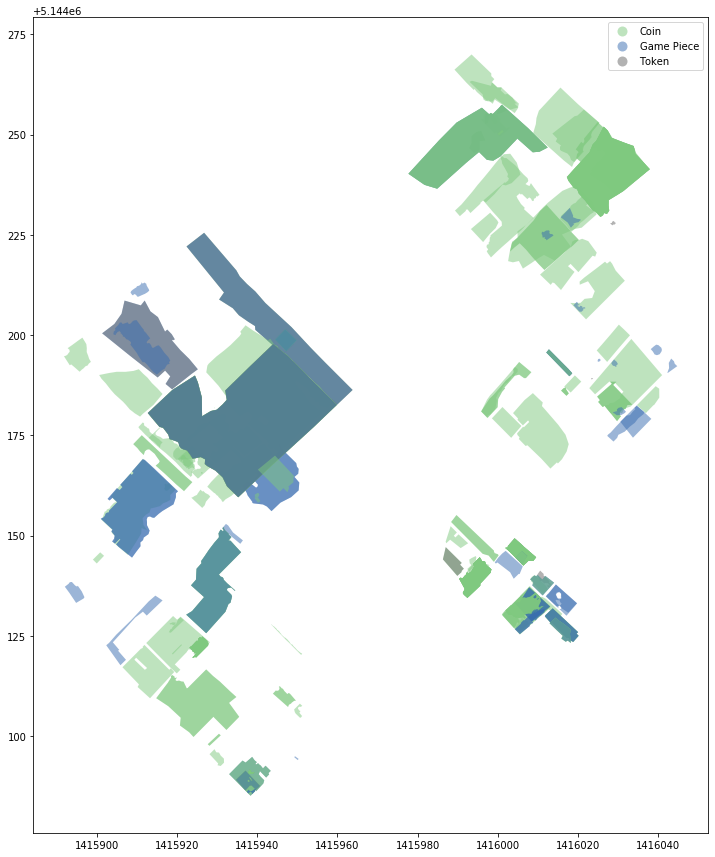

In [54]:
###codecell_SpatialPatterns_SeeingTextileToolsinContext

# If we want to see this result as a map, we just add the .plot command to the end of the dataframe's name
# here .plot() symbology is expanded to transparency  with 'alpha=' where value of 1 is complete opacity and 0 complete transparency  

gabii_gambling.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

####**But what do you see really?**###
OK, what do you see here? Compare the distribution of each type of textile tool. Do some types seem to be **concentrated** in certain areas? How might you check? What **factors** might contribute to this pattern? Do big layer simply aggregate lots of stuff? Do late dumps contain early materials? Why would one type of tool appear where the others don't?

In [55]:
###codecell_SpatialPatterns_SortingDataTextileTools

# We can try and see the relationship between layer size and count by sorting
#our list of finds by the surface area of each layer.
# We use the command 'sort_values' 

gabii_gambling.sort_values(by=['Shape_Area'],ascending=False)

# '.sort_values' function sort along their axis (here the axis is defined by 'Shape_Area' ). 
# the default sorting is on ascending values (smallest to largest) if you are happy with this =True, however, we want to see them in descending order, so we select =False

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
74,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,269,coin,Coin
70,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,70,Lead Token / Tessera,Token
76,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,2571,Black gloss game piece,Game Piece
71,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,90,coin,Coin
72,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,102,coin,Coin
...,...,...,...,...,...,...,...,...,...
64,"POLYGON Z ((1415926.128 5144165.872 63.105, 14...",1750,TOP,1231,1.383808,0.133112,409,Coin (AE) - double litra,Coin
210,"POLYGON Z ((1416006.287 5144135.281 0.000, 141...",5924,FILL,7107,1.263433,0.113701,2173,Bronze coin,Coin
162,"POLYGON Z ((1416023.761 5144189.209 61.117, 14...",5274,DEP,8007,1.298531,0.102000,1725,Lead token,Token
60,"POLYGON Z ((1415929.409 5144181.776 63.832, 14...",1380,TOP,1237,0.470778,0.016258,194,coin,Coin


####**Knowing your site and refining your analysis**####
Gabii excavations have revealed that there are enormous colluvial layers. This is an important consideration as these large areas will contribute to a bias distribution of the artefacts across the site. Therefore, very large areas should probably be excluded.

In [0]:
###codecell_SpatialPatterns_RefiningDataSorting

# Outliers will mess with any analysis. Here large stratigraphical layer are our outliers
# By cutting out these layers i.e. excluding SUs with a surface area greater than 800 we can deal with these outliers

gabii_gambling2 = gabii_gambling.loc[gabii_gambling['Shape_Area']<800]


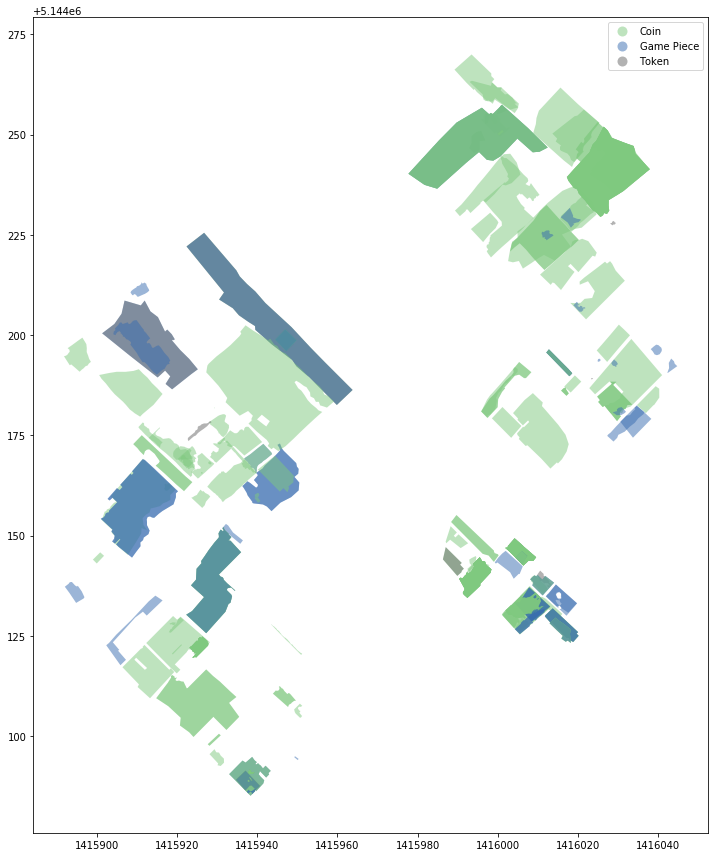

In [58]:
###codecell_SpatialPatterns_VisualisingDataSorting

# If we want to see this result as a map, we just add the .plot command to the end again.

gabii_gambling2.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

# That's better. Plot the results to see that you've removed the big colluvial layers.

####**Grouping and merging further**#### 
to answer to question: how many of each tool type appears in each SU? You will need to further group and merge your data.

In [28]:
###codecell_SpatialPatterns_GroupingData

# OK, count up how many of each tool type appears in each SU using the 'groupby' command. 
# You have used this command before in #codecell_Webmaps&Distributions_SplittingUrData_CreateLayers 
## and .fillna() was explained in codecell_Webmaps&Distributions_AllNumbers 

textools_counts = gabii_textools2.groupby('SU')['SF_OBJECT_TYPE'].value_counts().unstack().fillna(0)


# Sort the list so that the SUs with the most stuff end up at the top.
textools_counts.sort_values(by=['Loom Weight','Spindle Whorl','Spool'], ascending=False)

SF_OBJECT_TYPE,Loom Weight,Spindle Whorl,Spool
SU,,,
8118,18.0,0.0,0.0
8318,10.0,0.0,0.0
427,8.0,0.0,0.0
2385,5.0,0.0,0.0
2002,4.0,4.0,4.0
...,...,...,...
3714,0.0,0.0,1.0
3741,0.0,0.0,1.0
3792,0.0,0.0,1.0


In [32]:
###codecell_SpatialPatterns_MergingData

# Merge your textile tool counts with your spatial data for the contexts
# Because both dataframes have a 'SU' column, you can use this to match up the rows. 
# so the merger will occur on='SU'

gabii_textools_counts = gabii_su_poly.merge(textools_counts, on='SU')
gabii_textools_counts.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Loom Weight,Spindle Whorl,Spool
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,0.0,0.0,1.0
1,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",44,DEP,516,39.119255,43.687257,1.0,0.0,1.0
2,"POLYGON Z ((1415907.641 5144196.961 64.633, 14...",53,DEP,587,42.805154,63.212851,1.0,0.0,0.0
3,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",77,DEP,1306,35.183961,21.609902,0.0,0.0,1.0
4,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,1.0,0.0,0.0


#### **Visual assessment: exploring your data**#### 
 Side by side plots of different variables  can help you to visualize the differences between the spatial patterns you're exploring. Very much like in  lab2_MakeaBasicMap, when you compared Late Roman and
Middle Roman artefact distributions using two heatmaps side-by-side. 

In [30]:
###codecell_SpatialPatterns_AssessingFindType

# Let's start by looking at each class of textile tool individually. 
# Plot the counts of each type of find spatially

gabii_textools_counts.plot(column='Loom Weight', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Loom weight",'orientation': "vertical"})
gabii_textools_counts.plot(column='Spindle Whorl', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Spindle Whorl",'orientation': "vertical"})
gabii_textools_counts.plot(column='Spool', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Spool",'orientation': "vertical"})


NameError: ignored

In [31]:
###codecell_SpatialPatterns_PlottingAllFindType
# here's another visualisation. I've chosen a single colour scale - so shades of red, shades of blue, shades of green, to show the quantity of each type of find in a single map.

base = gabii_textools_counts.plot(column='Loom Weight', cmap='Blues', figsize=(15, 15), alpha=0.7)
gabii_textools_counts.plot(ax=base, column='Spindle Whorl', cmap='Reds', alpha=0.7)
gabii_textools_counts.plot(ax=base, column='Spool', cmap='Greens', alpha=0.7);


NameError: ignored

**Let's get another library to help visualisation**
So far, it has been difficult to see what's happening, to identify activities between the buildings and to compare the maps when we have to scroll.


In [0]:
##codecell_SpatialPatterns_ImportUrLibraries
import matplotlib.pyplot as plt

(1415887.009595, 1416047.574505, 5144077.642320001, 5144272.24288)

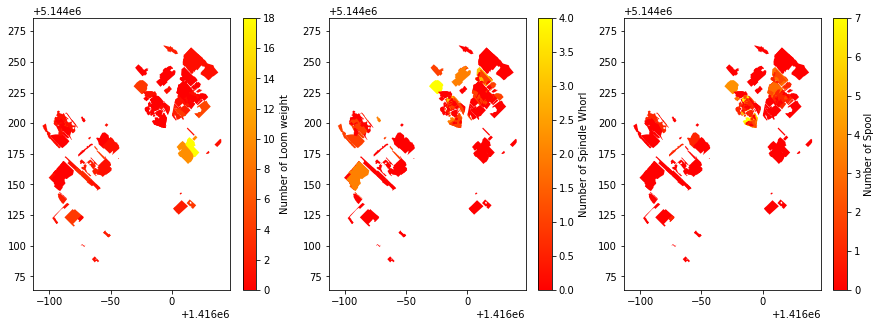

In [34]:
###codecell_SpatialPatterns_AllFindTypeSidebySide

# Let's put the maps side by side to help with comparative visualisation.
fig, axes = plt.subplots(ncols=3,figsize=(15, 5))
gabii_textools_counts.plot(column='Loom Weight', cmap='autumn',  ax=axes[0], legend=True, legend_kwds={'label': "Number of Loom weight",'orientation': "vertical"}).axis('equal')
gabii_textools_counts.plot(column='Spindle Whorl', cmap='autumn', ax=axes[1], legend=True, legend_kwds={'label': "Number of Spindle Whorl",'orientation': "vertical"}).axis('equal')
gabii_textools_counts.plot(column='Spool', cmap='autumn',ax=axes[2], legend=True, legend_kwds={'label': "Number of Spool",'orientation': "vertical"}).axis('equal')

###**Questioning your maps**###
Can you see any **patterns** here? Do the different types of tools **concentrate** in the same parts of the site? Why might different types of tools have different **distributions**? 

### ~ ###
*OK, this next big scary cell is because google has broken something in colab after I drafted this exercise. Push run to fix the thing they've broken (hopefully).*

In [35]:

#@title
!apt-get install -qq curl g++ make
#@title
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
#@title
import os
os.chdir('spatialindex-src-1.8.5')
#@title
!./configure
#@title
!make
#@title
!make install
#@title
!pip install rtree
#@title
!ldconfig
#Working through the example at http://toblerity.org/rtree/examples.html
#@title
from rtree import index
from rtree.index import Rtree
#@title
p = index.Property()
idx = index.Index(properties=p)
idx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   424k      0  0:00:01  0:00:01 --:--:--  424k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

###**Quantifying these patterns**###

### Using statistics to explore, characterize and quantify spatial patterns



In [37]:
##codecell_SpatialPatterns_ImportUrLibraries

# I think the distributions of different weaving tools vary.
# To investigate further, we are going to need more tools. Specifically we need statistical tools. 
# pysal, numpy and sklearn are all useful for statistics. Seaborn is useful for visualisation. 
!pip install pysal
import pysal
from sklearn import cluster
import seaborn as sns
import numpy as np

####**Data Clustering**#### 
We're going to use **cluster analysis** to try and better understand our patterns. Clustering is a broad set of techniques for finding groups within a data set. Cluster analysis has as its objective grouping together similar observations (unlike factor analysis works by searching for similar variables).
<br> 
Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. The clustering algorithm tests the hypothesis that data points of the same group have similar properties, and that data points in different groups have dissimilar properties. So, when we cluster observations, we want items in the same group to be similar and items in different groups to be dissimilar. <br>  
**K-Means clustering** is probably the most well-known clustering algorithm that  solve  clustering problem by splitting  a dataset into a set of k (k being an arbitrary number you get to choose) groups. 
 <br> K-Means Clustering explained in 5 visual steps:
* Step1: assign each points to similar centre => we need to identify the number of classes to use by  looking at the data and identifying any discrete groupings.  <br> 
 <img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/LAb4_patternss_clusters.png?raw=1" width="200"/> </div>  <br> 
* Step2: identify the cluster centroids (3 coloured symbols on graph). <br> 
<img src="https://developers.google.com/machine-learning/clustering/images/Initialization.svg" width="200"/> </div>  <br> 
* Step 3: reassign the points based on the minimum distance or closest from cluster centroids. Here we should emphasise that there many possible definitions that may be used for “closest” (e.g.nearest neighbour, Ward's method).   <br> 
<img src="https://developers.google.com/machine-learning/clustering/images/Step2.svg" width="200"/> </div>  <br> 
* Step 4: identify the new centroids by taking the average of all points in the cluster.  <br> 
<img src="https://developers.google.com/machine-learning/clustering/images/Step3.svg" width="200"/> </div>  <br> 
* Step 5: reassign the groupings -points and assignment- until points stop changing clusters in a loop. <br> 
<img src="https://developers.google.com/machine-learning/clustering/images/Step4.svg" width="200"/> </div>  <br> 


Because clustering allows us to identify which things are alike on the basis of multiple characteristics, we will do just that. We will use cluster analysis to see which SUs are similar in terms of all three types of textile tools: loom weights; spools; spindle whorls. In #codecell_SpatialPatterns_ImportUrLibraries, we import a cluster tool from sklearn to help us with it.

###**Clustering types of textile tools**###


####**Let's use python to run K-means function**####
First, we want to cluster together contexts where the pattern of the three types of textile tools are similar.

In [38]:
##codecell_SpatialPatterns_ClusterTextileTools

# Next step: cluster together contexts where the pattern of the three types of textile tools are similar, 
# with and without respect to the size of the SU.
# In this cell we are including information on the size of the SU
# we will use three functions .cluster.Kmeans, .fit() and .drop():

km5 = cluster.KMeans(n_clusters=5)
km5cls = km5.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
km5cls



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#####**Learning a new language – decomposing the code** #####

In #codecell_SpatialPatterns_ClusterTextileTools, by:
* using <font color='magenta'>  .cluster.Kmeans()</font> function,
 we have arbitrarily given k (n_clusters) an arbitrary value of 5 groups
 <br> 
* using <font color='magenta'>  .fit()</font> function, we wanted to estimate the best representative function for the data points on account for the size of the context (*'Shape_Area'*) and counts of different types of tools(*Loom Weight, Spindle Whorl, Spool*). 
* using <font color='magenta'>  .drop()</font> function Drop all the other fields (*'geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'*).

#####**let's visualise this first step**#####
Each cluster produced should contain the SUs that are similar to one another on the basis of the number of each type of textile tool and the size of the surface area of the SU. 

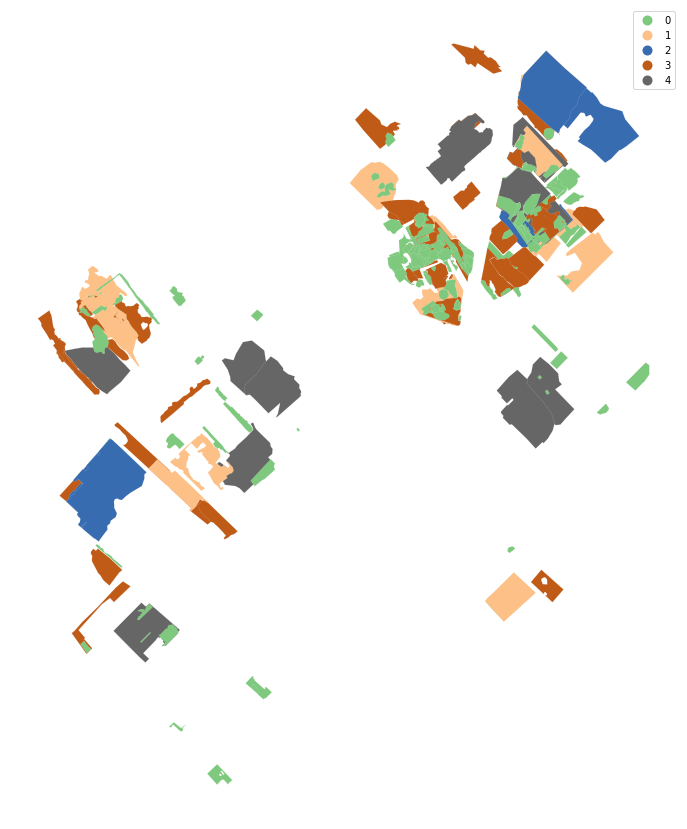

In [39]:
##codecell_SpatialPatterns_SubPlotClusterTextileTools

# Plot the clusters, groups of contexts that have similar textile tool assemblages.
# Give a different colour to the SUs that belong to each cluster.

#creating a single chart
f1, ax = plt.subplots(1, figsize=(15,15))
#plt.subplots() is a function that returns a tuple (=sequence of immutable Python objects like a list)
#this tuple contains a figure and axes object(s)
#so, when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax.
#here f1 is your figure

#here we want to assign() our new clustering labels 'km5cls.labels_'to the dataframe
#and also plot the cluster ('cl'). (nb: that ax=ax are the features/objects here)
gabii_textools_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()
#turn x and y-axis off which will affect the axis lines, ticks, ticklabels, grid and axis labels

#let's see the plot using command plt.show()
plt.show()

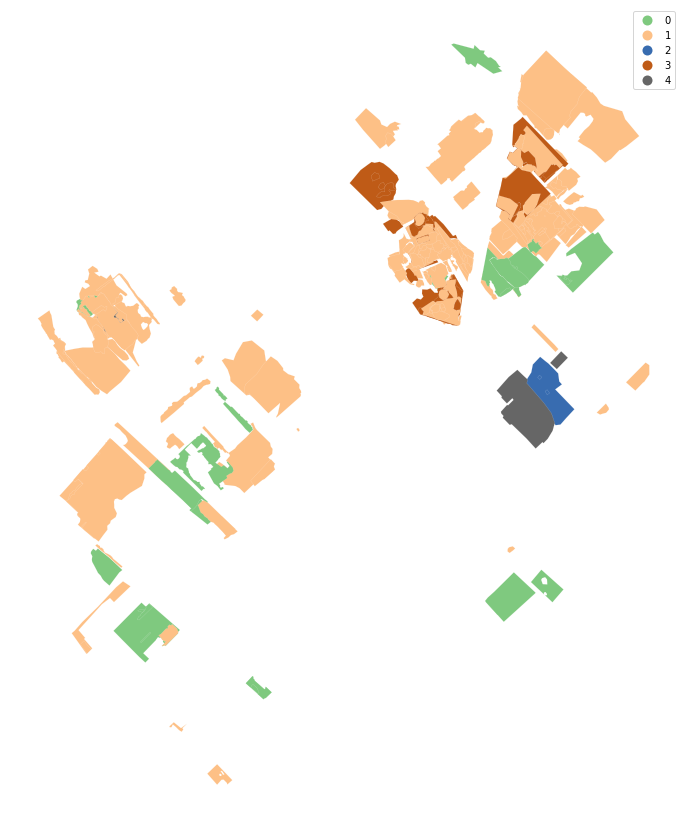

In [40]:
##codecell_SpatialPatterns_ClusterTextileTools_2

#Do the same as in ##codecell_SpatialPatterns_ClusterTextileTools
#but let's ignore the size of the context so we also .drop('Shape_Area').


km5 = cluster.KMeans(n_clusters=5)
km5cls2 = km5.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)

#we plot as in ##codecell_SpatialPatterns_SubPlotClusterTextileTools
#this time a'f2' and our new cluster 'cl2'

f2, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

###**Start interpreting**###


####**Visualising clustering analysis differences**####
The patterns are definitely different. How can we interpret the fact that context size affects the pattern of the distribution of textile tools? Do big units, which perhaps represent dumps or colluvial mashups, have a fundamentally different character than the varied small contexts?

(1415887.0095949997, 1416047.5745049997, 5144077.642320001, 5144272.24288)

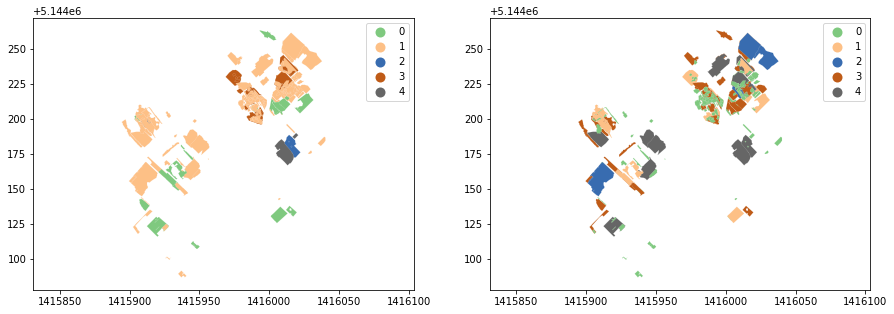

In [41]:
##codecell_SpatialPatterns_SubPlotClustersSidebySide

# Look at the difference with and without context size taken into account.

#we are plotting just like in##codecell_SpatialPatterns_SubPlotClusterTextileTools
#however we want to see them side by side to see effect of our selection.
#To do so, we define our plt.subplots as having 2 columns (ncols=2)

fig, axes = plt.subplots(ncols=2,figsize=(15, 5))


gabii_textools_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[0]).axis('equal')
gabii_textools_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[1]).axis('equal')

# note here that we have to 2 axes for our to feature classes: 
# ax=axes[0] for the first subplot and  ax=axes[1] for the second subplot 

####**Characterising our cluster analyses**####
There are many ways to label your data in matplolib, [here](https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python) are some examples.

In [42]:
##codecell_SpatialPatterns_AddLabelClusterstoDataframe

# assign the cluster IDs to each context permanently
gabiitextools_clas = gabii_textools_counts.assign(cl=km5cls.labels_)
gabiitextools_class = gabiitextools_clas.assign(cl2=km5cls2.labels_)

#and let's check how your dataframe looks like
gabiitextools_class.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Loom Weight,Spindle Whorl,Spool,cl,cl2
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,0.0,0.0,1.0,1,1
1,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",44,DEP,516,39.119255,43.687257,1.0,0.0,1.0,3,1
2,"POLYGON Z ((1415907.641 5144196.961 64.633, 14...",53,DEP,587,42.805154,63.212851,1.0,0.0,0.0,1,1
3,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",77,DEP,1306,35.183961,21.609902,0.0,0.0,1.0,3,1
4,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,1.0,0.0,0.0,4,1


####**Data interpretation: push your cluster analyses further **####
Data exploration can help us to understand how well the cluster analysis performed.


#####*Let's compare the effect of area size to one cluster group/class*#####

(1415897.0595099998, 1416038.09469, 5144099.0472, 5144271.2236)

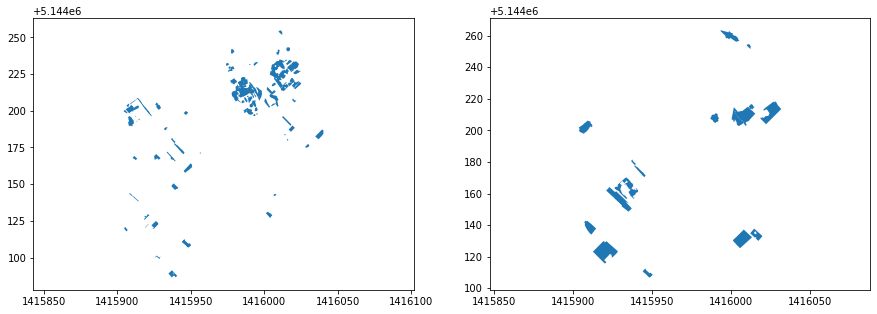

In [43]:
##codecell_SpatialPatterns_SubselectClustergroupN.0

# Now let's look at some individual classes, with and without context size accounted for in the analyses.
# We choose the cluster group/class 0
# we use .loc[] command (see##codecell_makeabasicmap_BringingUrData2theMap &  #codecell__Webmaps&Distributions_SplittingUrData)
# and create 2 dataframes:
# With=> [gabiitextools_class['cl']where we only select (==) group 0
# Without=> [gabiitextools_class['cl2']where we only select (==) group 0

gabiitextools_class0=gabiitextools_class.loc[gabiitextools_class['cl']==0]
gabiitextools_class0noarea=gabiitextools_class.loc[gabiitextools_class['cl2']==0]

#we are plotting just like in##codecell_SpatialPatterns_SubPlotClustersSidebySide

fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabiitextools_class0.plot(ax=axes[0], legend=True).axis('equal')
gabiitextools_class0noarea.plot(ax=axes[1]).axis('equal')

#####*Effect of changing cluster numbers*####

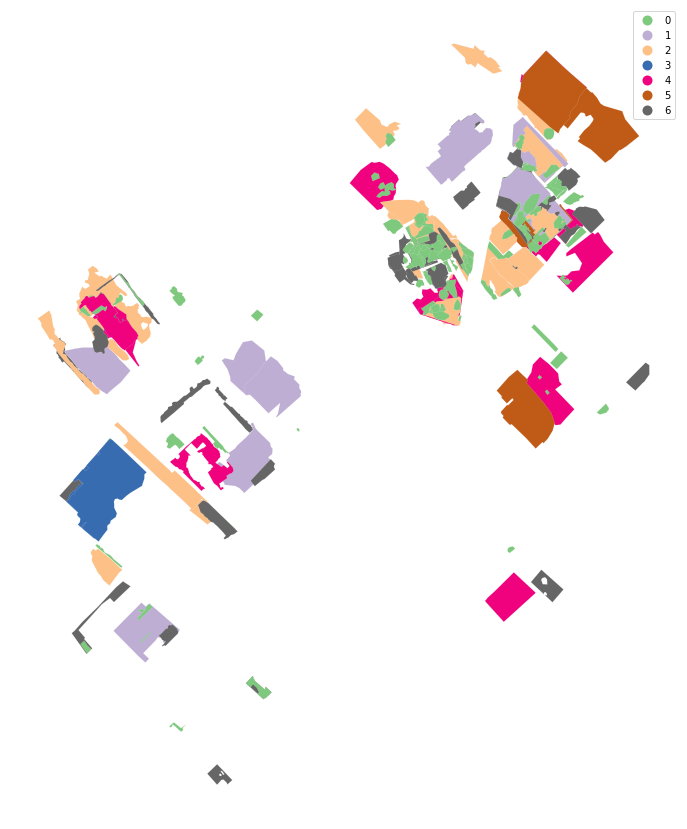

In [44]:
##codecell_SpatialPatterns_ClusterTextileTools_7types_WithContextSize 

# What happens when we change the number of clusters (groups)?
# let's repeat our first analysis (##codecell_SpatialPatterns_ClusterTextileTools) 
# and let's keep the context size ('Shape_area')
km7 = cluster.KMeans(n_clusters=7)
km7cls3 = km7.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
f3, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl3=km7cls3.labels_)\
   .plot(column='cl3', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

That also changes things. Without going into too much detail, finding the ideal number of clusters is challenging. There are many statistical techniques to help you choose the best number of clusters. However, this is for a more advanced stats course! For now, just try playing around with the number of clusters in the notebook, or the size cut-off for inclusion. 

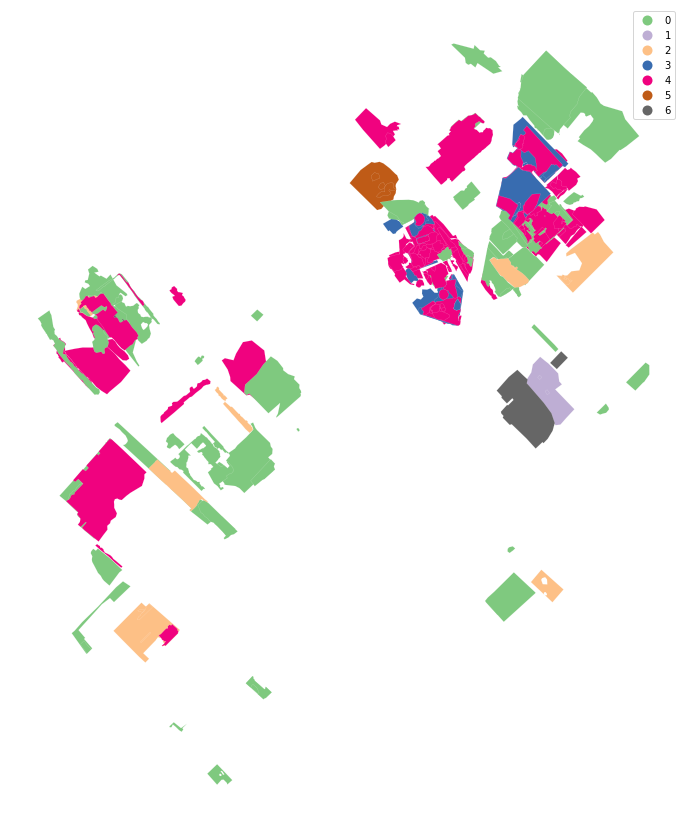

In [45]:
##codecell_SpatialPatterns_ClusterTextileTools_7types_WithoutContextSize


# Use 7 clusters folowing the same procedure than in ##codecell_SpatialPatterns_ClusterTextileTools_7types_WithContextSize 
# and let's drop the context size ('Shape_area')

km7 = cluster.KMeans(n_clusters=7)
km7cls4 = km7.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f4, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl4=km7cls4.labels_)\
   .plot(column='cl4', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [46]:
##codecell_SpatialPatterns_AddLabelto7ClusterGroups

# assign the cluster IDs to each context permanently just like in ##codecell_SpatialPatterns_AddLabelClusterstoDataframe

# Let's set up to investigate some of the individual clusters
gabiitextools_class3=gabiitextools_class.assign(cl3=km7cls3.labels_)
gabiitextools_class4=gabiitextools_class3.assign(cl4=km7cls4.labels_)
gabiitextools_class4.head()


,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Loom Weight,Spindle Whorl,Spool,cl,cl2,cl3,cl4
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,0.0,0.0,1.0,1,1,4,4
1,"POLYGON Z ((1415914.183 5144202.085 64.693, 14...",44,DEP,516,39.119255,43.687257,1.0,0.0,1.0,3,1,2,0
2,"POLYGON Z ((1415907.641 5144196.961 64.633, 14...",53,DEP,587,42.805154,63.212851,1.0,0.0,0.0,1,1,4,0
3,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",77,DEP,1306,35.183961,21.609902,0.0,0.0,1.0,3,1,6,4
4,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,1.0,0.0,0.0,4,1,1,0


#####*Let's compare the effect of changing cluster number (from 5 to 7) and area size to one cluster group/class*#####

Text(0.5, 1, '7 clusters - no area')

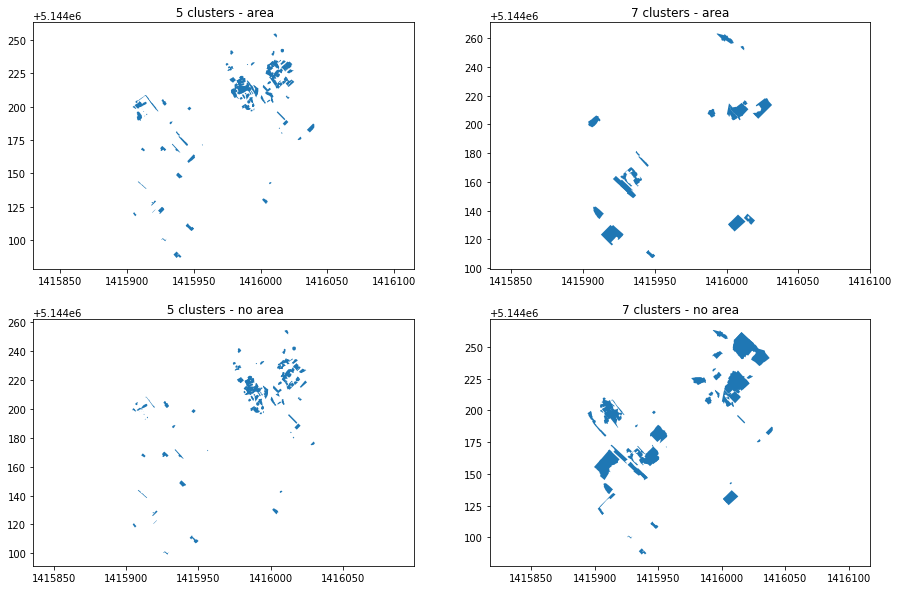

In [47]:
##codecell_SpatialPatterns_EffectofClusterNumber&AreaSizetoClustergroupN.0

#we are following the same step than in ##codecell_SpatialPatterns_SubselectClustergroupN.0 but with our 7 cluster groups/classes
# set up variables to store several classes, with and without context size taken into account.
gabiitextools_class0=gabiitextools_class4.loc[gabiitextools_class4['cl']==0]
gabiitextools_class0noarea=gabiitextools_class4.loc[gabiitextools_class4['cl2']==0]
gabiitextools_k7_class0=gabiitextools_class4.loc[gabiitextools_class4['cl3']==0]
gabiitextools_k7_class0noarea=gabiitextools_class4.loc[gabiitextools_class4['cl4']==0]

# setting the subplots to the four dataframes, we have just identified above
# this can be done by arranging the subplots like a 2X2 table/array with 'ncols=2' & 'nrows=2'
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))

gabiitextools_class0.plot(ax=axes[0,0]).axis('equal')
#note here the ax=axes defines the position of the figure in this 2X2 array (in this case is cell column 0, row0)
axes[0,0].set_title(' 5 clusters - area')
#for ease, we have added a title to the subplots

gabiitextools_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiitextools_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiitextools_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

#####*Let's compare the effect of changing cluster number (from 5 to 7) and area size to other cluster groups/classes*#####

Text(0.5, 1, '7 clusters - no area')

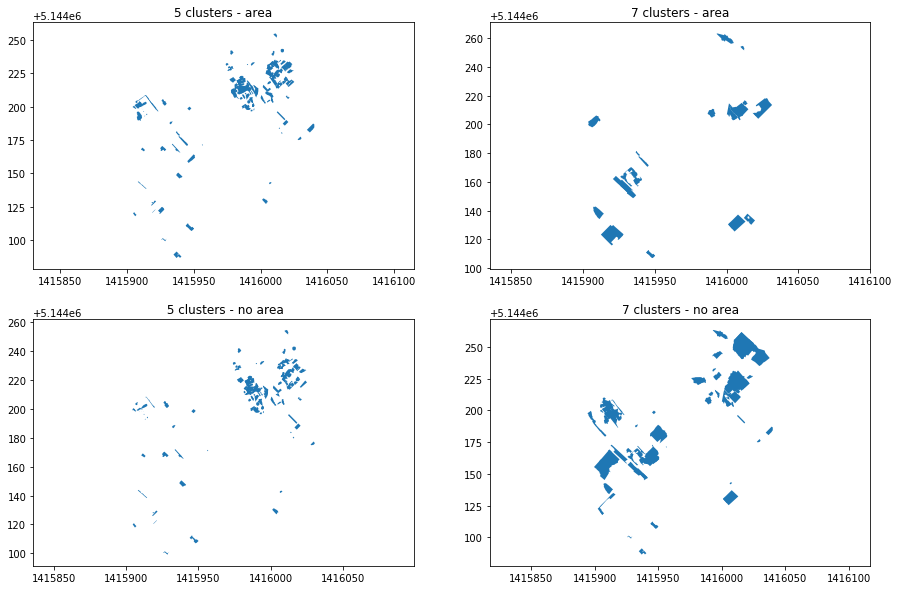

In [48]:
##codecell_SpatialPatterns_EffectofClusterNumber&AreaSizetoClustergroupN.3

# now try some different cluster groups
# we are choosing cluster no.3 this time

#we are following our previous steps

gabiitextools_class3=gabiitextools_class4.loc[gabiitextools_class4['cl']==3]
gabiitextools_class3noarea=gabiitextools_class4.loc[gabiitextools_class4['cl2']==3]
gabiitextools_k7_class3=gabiitextools_class4.loc[gabiitextools_class4['cl3']==3]
gabiitextools_k7_class3noarea=gabiitextools_class4.loc[gabiitextools_class4['cl4']==3]


fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiitextools_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('5 clusters - area')
gabiitextools_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiitextools_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiitextools_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

Cluster analysis is an important statistical technique. While not the main focus of this course, it's worth learning more about it. 

We have used K-Means clustering because it presents the advantage to be fast, easy to understand and fairly robust and efficient; however, it has disadvantages too, such as the number of groups/classes selection (and as you have seen which isn’t always inconsequential; ideally, you'd want the algorithm to figure this out). Furthermore, K-Means clustering cannot deal with non-linear dataset and if  there are  highly overlapping data then k-means will not be able to resolve the differentiation between clusters. Best results can be achieved when datasets are distinct or well separated from each other.

 **Reminder: linear versus non-linear datapoints:**<br>
<img src="http://www.statistics4u.com/fundstat_eng/img/hl_linnonlin_classif.png
" width="600"/> </div>
<br>

K-means is not the only clustering technique. I encourage you to do some independent reading on different approaches to clustering. You may want to have a look at [this](https://scikit-learn.org/stable/modules/clustering.html#clustering) to start off. 



####**Data interpretation: Using association and relationships**####

Although we can see differences, it is difficult to:
* see them all
* quantify them
* express them
Let's turn to Statitics to do this for us. <br>
In ##codecell_SpatialPatterns_ImportUrLibraries, you have imported [seaborn library](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to do just that.



#####**Starting to understand Correlation**#####
Correlations  are statistical associations between two variables. When we say that two variables are associated, we are suggesting that they vary (change) together. This implies that the processes that affect these variables may be related. We try to detect correlation to understand the relationship between two variables.

For example: should we expect the pattern of loom weights to be similar to the pattern of spindle whorls? should we expect them to be correlated?


Note that: **Correlation does not imply causation!** That is, the pattern of loom weights does **not** cause or create the pattern of spindle whorls.<br>
<br>
* Correlation tests describe the statistical relationship between two different variables, in contrast to comparison tests which evaluate the differences between variables (e.g. t-test, sign test, Mann-Whitney). 
* Another important characteristic of the correlation statistics is that they do not only identify relationships but they characterise both the strength and the form of these relationships. 
* The robustness of the correlation calculations is, again, evaluated in terms of statistical significance using the p-value. 

The most frequently used Parametric correlation statistic is the **Pearson’s correlation r**. Pearson’s r tests if there is a linear relationship between two variables, and can only range between -1 and 1, where -1 indicates perfect negative **linear** (one to one) correlation and +1 indicates the perfect positive linear correlation (see Figure below). 
<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/LinearCorre.png?raw=1" width="800"/> </div>
 **Examples of Pearson's correlation coefficient (r) for different degrees of linearity**

Note that besides the sign of the correlation (positive or negative) the key term here is the term linear. We can only argue about linear relationships when we apply **parametric** correlation. A general **Non-Parametric** correlation statistic is the Spearman’s ρ (rho) correlation.
<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/SpearCorre.png?raw=1" width="800"/> </div>
**Examples of Spearman's correlation coefficient (r) for different degrees of monotonic and non-monotonic relationships**

As you can see, a fundamental concept is hidden behind these types of statitistical tests, and, in fact behind all statistics, which is parametric vs. nonparametric distributions... you can start finding more about this important set of statistical concepts [here](https://blog.minitab.com/blog/applying-statistics-in-quality-projects/a-correspondence-table-for-non-parametric-and-parametric-tests).



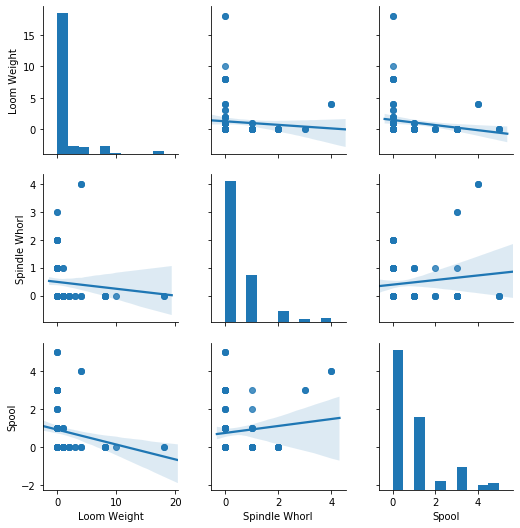

In [49]:
##codecell_SpatialPatterns_EffectofClusterNumber

# Do 7 clusters vs. 5 result in more correlation between the spatial distribution patterns of pairs of find types?
# we are simply using sns.pairplot function to visualize relationships (correlations) between the find types and the clusters they appear in. 
# We are asking: do certain pairs of variables appear in the same clusters most of the time? 

sns.pairplot(gabiitextools_k7_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()

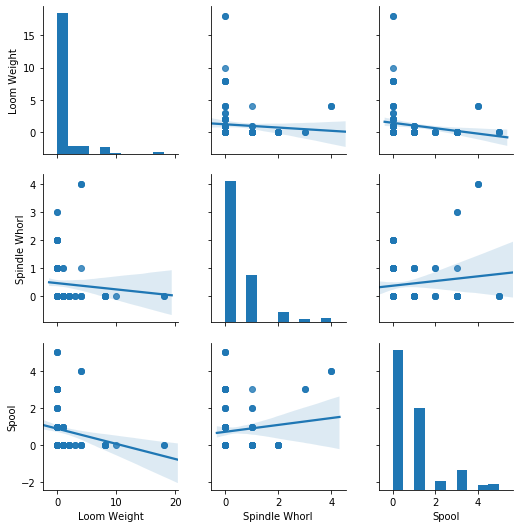

In [50]:
##codecell_SpatialPatterns_EffectofClusterNumber

# Are some cluster classes/groups more correlated than others?
sns.pairplot(gabiitextools_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()


###What can you conclude?###

Is there strong positive or negative correlation between pairs of variables (textile tools and the clusters they end up in)? What might this say about the processes behind these patterns? 

Statistically assessing correlation is a good starting point for understanding patterns in your data. 

Because this isn't a stats course, we're not taking this forward any further today. But it's worth noting that if you want to do spatial analysis properly at some stage you will need to learn a bit about statistics. 

### **That concludes this tutorial**###

Hopefully you have:
* started thinking (and perhaps are a bit confused) about how spatial patterns of different types of finds are created, and how we can interpret them when studying data from an excavation.
* learned to combine spatial data and descriptive tables. 
* learned to use some basic clustering tools, and reinforced your knowledge about how to make charts and maps. 


#**LexiCode**
To re-use the codes - you will need to first load their respective libraries.  So far, you have used ...:


<br>

> **libraries** | | |
>--- |--- | --- | 
>folium | numpy  | 
>branca| rtree | 
>pandas| osmnx| 
>geopandas| requests | 
>seaborn | fiona| 
>matplotlib.pyplot | ipywidgets|
> pysal |seaborn |
> 
<br>

 **plugins**| |
--- |--- |
HeatMapWithTime
HeatMap
MeasureControl
PrepareUrBasemaps_CreateLayers from [folium.plugins]
cluster (from sklearn)

<br>

your lexicode is non-exhaustive, keep expanding, find your own 'best way' to reuse these code/scripts...

<br>

>Lexicode_MakingaBasicMap | Lexicode_Webmaps&Distributions |Lexicode_StreetGridOrientations | Lexicode_SpatialPatterns
>--- | --- | ---|---|
>	==   () [] | pd.concat() | { } *subselection from list*|
>.head_csv() | .dtype() | ox.gdf_from_places()|requests.get()|requests.get()
>.read_csv() | astype() | ox.plot_shape()|request.content()
>mean()  | fillna()|network_type= ''|.bytes()
>folium.Map | def return |ox.add_edge_bearings(ox.get_undirected())|gpd.GeoDataFrame.from_features()
>range() | .apply(lambda x:*function*,axis=) |count_and_merge()|Set()
>len() | pd.merge() |np.arrange()|pd.value_counts() 
>iloc[]| how= , left_index= ,left_index= |np.histogram()|.merge()
>.value_counts()| gpd.GeoDataFrame()| ax.set_theta_location()|.sort_values
>if =:| geometry=gpd.points_from_xy |ax.set_ylim()|cluster.KMeans()
>elif =: |print() |ax.set_title()|.fit()
>else =:| .isin()|ax.set_yticks()|.drop()
>folium.Marker()| classic.plot()|ax.set_xlabels() & ax.set_yticklabels|.assign()
>folium.Icon()| generateBaseMap()|plt.subplots()|plt.show()
>folium.Circle| .groupby(['', ''])|.dropna()|.set_title
>popup= | .reset_index() |polar_plot()|sns.pairplot()
>radius= |  max_zoom= |pd.Series()|
>.values.tolist() |folium.TileLayer()|np.pi|
> .add_to()| plugins.DualMap(location= , tiles= , zoom_start= )|
>  | 

